In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.special import jv
from scipy.special import yv
from scipy.optimize import minimize as mini

In [3]:
def func(x,p,l):
    v=l-p
    return jv(v,x)*yv(v,3*x)-jv(v,3*x)*yv(v,x)

In [4]:
def ro(L,p):
    return [[mini(lambda x: func(x,i,l), x0=3).x[0] for i in p] for l in L]

In [5]:
p=linspace(0,3,500)
L=arange(-6,7,1)

In [6]:
r=ro(L,p)

In [7]:
E=[np.partition(r, i, axis=0)[i] for i in range(4)]

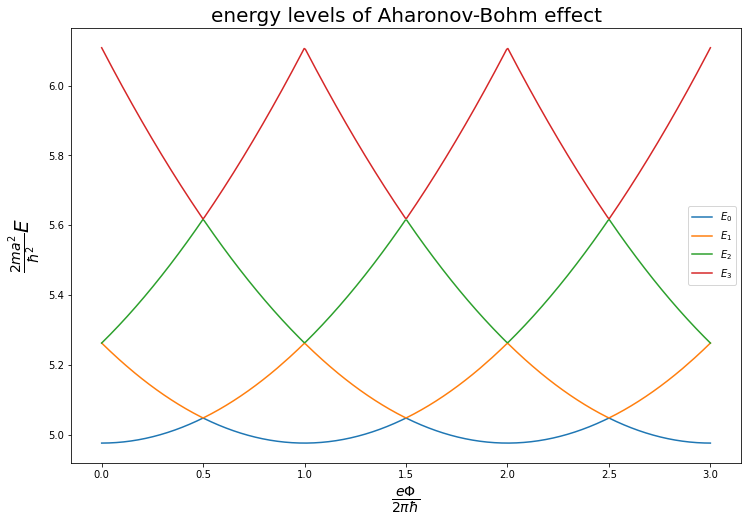

In [8]:
figure(figsize=(12,8))

for i in range(len(E)):
    y=array(E[i])**2
    plot(p,y,label=r'$E_{%s}$'%i)
    
xlabel(r'$\frac{e \Phi}{2 \pi \hbar}$', fontsize=20)
ylabel(r'$\frac{2ma^2}{\hbar^2}E$', fontsize=20)
title('energy levels of Aharonov-Bohm effect',fontsize=20 )
legend(loc='best')
show()